In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [74]:
filename = 'imagem.jpeg'
im = cv2.imread(filename, 0)

In [75]:
print(im)
print(im.shape)

[[189 205 246 ... 144 142 140]
 [209 201 207 ... 140 134 140]
 [169 213 215 ... 149 150 168]
 ...
 [207 213 211 ... 111 132 120]
 [183 192 199 ...  94 113 103]
 [186 194 201 ... 106 119 105]]
(344, 500)


In [76]:
width = im.shape[1]
height = im.shape[0]

In [77]:
cv2.imshow('imagem', im)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [79]:
neg_im = im.copy()

for c in range(0, width - 1):
    for l in range(0, height - 1):
        px = neg_im.item(l, c)

    #negativo
        neg_im.itemset(l, c, 255 - px)

In [80]:
cv2.imshow('negativa', neg_im)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [81]:
bin_im = im.copy()

for c in range(0, width - 1):
    for l in range(0, height - 1):
        px = bin_im.item(l, c)

    #binarização
        if px > 100:
            bin_im.itemset(l, c, 255)
        else:
            bin_im.itemset(l, c, 0)

In [82]:
cv2.imshow('binarizada', bin_im)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [83]:
#redimensiona a imagem
new_width = int(im.shape[1] * .5)
new_height = int(im.shape[0] * .5)
dim = (new_width, new_height)
im_resized = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)

In [84]:
#mostra imagem com opencv
cv2.imshow('resized',im_resized)
cv2.imshow('imagem',im)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [85]:
#calcula o histograma
bins = 256
hist = cv2.calcHist([im], [0], None, [bins], [0, bins])
x_coord = np.arange(bins)
# print(hist) 

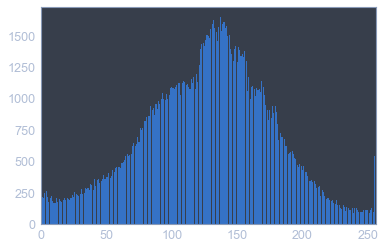

In [86]:
#mostra o histograma
plt.bar(x_coord, hist.reshape(-1))
plt.xlim([0, bins])
plt.show()

In [90]:
#Equaliza histograma com CDF
im_eq_cdf = cv2.equalizeHist(im)
cv2.imshow('im-eq', im_eq_cdf)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [91]:
#Equaliza histograma com ajuste local e constrate limitado
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
im_eq_clahe = clahe.apply(im)
cv2.imshow('imagem',im)
cv2.imshow('im-clahe', im_eq_clahe)
cv2.waitKey(0)
cv2.destroyAllWindows()

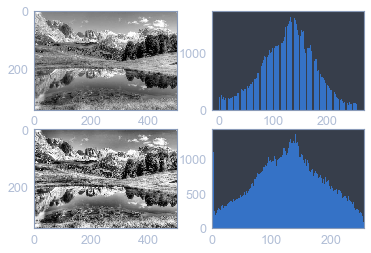

In [92]:
#mostra imagem com matplotlib
plt.subplot(221), plt.imshow(im, cmap='gray')
plt.subplot(222), plt.bar(x_coord, hist.reshape(-1))
plt.subplot(223), plt.imshow(im_eq_clahe, cmap='gray')
plt.subplot(224), plt.hist(im_eq_clahe.ravel(),256,[0,256])
plt.xlim([0, 256])
plt.show()